In [123]:
# Importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing the dataset

In [125]:
# Importing the dataset
dataset=pd.read_csv('roblox_games.csv')
print(dataset)

      Rank                                              Name   Active  \
0       #1                                       Blox Fruits  483,372   
1       #2                                    Brookhaven 🏡RP  474,141   
2       #3                                Dress To Impress 💜  297,764   
3       #4                                  PETS GO! ✨ [NEW]  172,411   
4       #5                                  Murder Mystery 2  159,531   
..     ...                                               ...      ...   
995   #996  [MOBILE/CONSOLE FIXED - BETA] The Time  of Ninja      706   
996   #997      TEAM BORRY PRISON BREAKOUT!👮 [TEAMWORK OBBY]      705   
997   #998                     [👻HALLOWEEN] ADC DANCE STUDIO      704   
998   #999                            🏈 Field Goal Simulator      703   
999  #1000           🎃HALLOWEEN🎃 After The Flash: Wintertide      703   

             Visits  Favourites      Likes Dislikes  Rating  
0    41,346,317,182  13,574,097  8,521,670  676,846   92.64  

In [126]:
# Checking for any null values
print(dataset.isnull().sum())

Rank          0
Name          0
Active        0
Visits        0
Favourites    0
Likes         0
Dislikes      0
Rating        0
dtype: int64


In [127]:
# Checking the type of dataset entries
print(dataset.dtypes)

Rank           object
Name           object
Active         object
Visits         object
Favourites     object
Likes          object
Dislikes       object
Rating        float64
dtype: object


In [128]:
# Preprocessing the columns except 'Name'
dataset['Rank'] = dataset['Rank'].astype(str).str.replace('#', '').astype(int)
for i in range(2, 7):
    dataset.iloc[:, i] = (
        dataset.iloc[:, i]
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
        .astype(int)
    )
print(dataset)

     Rank                                              Name  Active  \
0       1                                       Blox Fruits  483372   
1       2                                    Brookhaven 🏡RP  474141   
2       3                                Dress To Impress 💜  297764   
3       4                                  PETS GO! ✨ [NEW]  172411   
4       5                                  Murder Mystery 2  159531   
..    ...                                               ...     ...   
995   996  [MOBILE/CONSOLE FIXED - BETA] The Time  of Ninja     706   
996   997      TEAM BORRY PRISON BREAKOUT!👮 [TEAMWORK OBBY]     705   
997   998                     [👻HALLOWEEN] ADC DANCE STUDIO     704   
998   999                            🏈 Field Goal Simulator     703   
999  1000           🎃HALLOWEEN🎃 After The Flash: Wintertide     703   

          Visits Favourites    Likes Dislikes  Rating  
0    -2147483648   13574097  8521670   676846   92.64  
1    -2147483648   22117653  610876

# Exploratory Data Analysis(EDA)

C:\Users\ishaan\OneDrive\Attachments\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


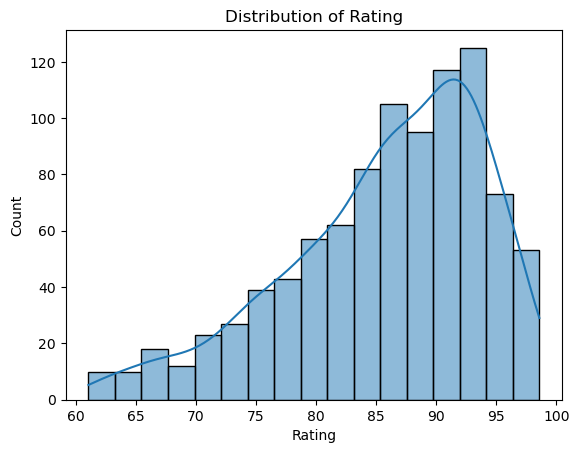

In [199]:
# Plotting distributions of columns
for col in dataset.select_dtypes(include=['float64','int64']).columns:
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

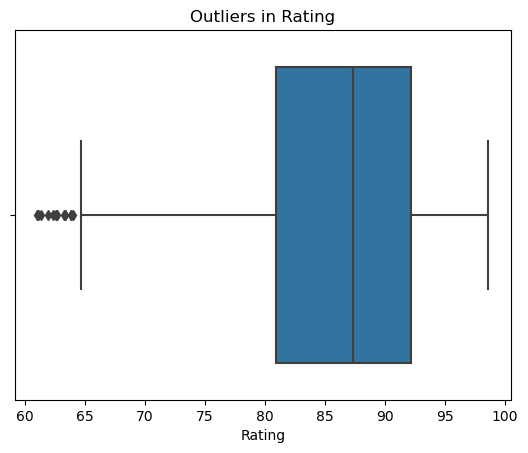

In [201]:
# Plotting boxplots to check for outliers
for col in dataset.select_dtypes(include=['float64','int64']).columns:
    sns.boxplot(x=dataset[col])
    plt.title(f"Outliers in {col}")
    plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

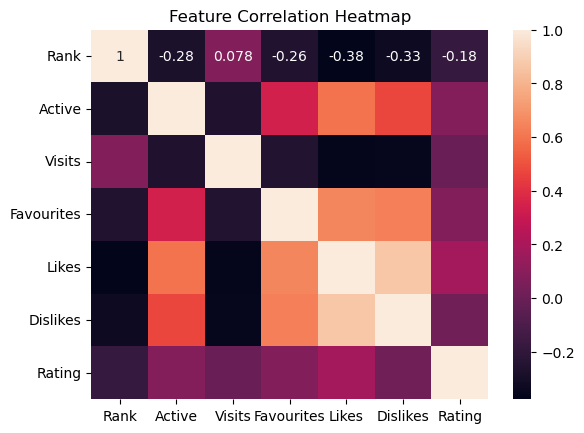

In [131]:
# Creating correlation matrix 
new_dataset=dataset.drop(columns=['Name'])
sns.heatmap(new_dataset.corr(), annot=True)
plt.title("Feature Correlation Heatmap")

In [132]:
# Detect and remove outliers using IQR
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1=dataset[col].quantile(0.25)
    Q3=dataset[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR    
    before=dataset.shape[0]
    dataset=dataset[(dataset[col]>=lower_limit)&(dataset[col]<=upper_limit)]
    after=dataset.shape[0]    
    print(f"{col}: Removed {before - after} outliers")
print("\nShape after outlier removal:", dataset.shape)

Rating: Removed 49 outliers

Shape after outlier removal: (951, 8)


In [133]:
# Printing new dataset
print(dataset)

     Rank                                              Name  Active  \
0       1                                       Blox Fruits  483372   
1       2                                    Brookhaven 🏡RP  474141   
2       3                                Dress To Impress 💜  297764   
3       4                                  PETS GO! ✨ [NEW]  172411   
4       5                                  Murder Mystery 2  159531   
..    ...                                               ...     ...   
995   996  [MOBILE/CONSOLE FIXED - BETA] The Time  of Ninja     706   
996   997      TEAM BORRY PRISON BREAKOUT!👮 [TEAMWORK OBBY]     705   
997   998                     [👻HALLOWEEN] ADC DANCE STUDIO     704   
998   999                            🏈 Field Goal Simulator     703   
999  1000           🎃HALLOWEEN🎃 After The Flash: Wintertide     703   

          Visits Favourites    Likes Dislikes  Rating  
0    -2147483648   13574097  8521670   676846   92.64  
1    -2147483648   22117653  610876

# Extracting features and target variables

In [135]:
# Extracting features and target variables
X1=dataset.iloc[:,0].values
X2=dataset.iloc[:,2:-1].values
X=np.column_stack((X1,X2))
y=dataset.iloc[:,-1].values

In [136]:
print(X)

[[1 483372 -2147483648 13574097 8521670 676846]
 [2 474141 -2147483648 22117653 6108763 955845]
 [3 297764 -2147483648 3182036 2042092 188403]
 ...
 [998 704 11811628 8996 4344 429]
 [999 703 43992091 411025 37371 6273]
 [1000 703 17272456 99057 27049 5060]]


In [137]:
print(y)

[92.64 86.47 91.55 93.18 91.05 96.83 83.83 96.05 83.56 87.29 93.08 95.88
 84.87 97.03 92.52 90.79 88.77 87.52 92.92 94.21 92.67 93.58 91.86 94.93
 90.59 84.07 88.14 72.71 82.52 90.32 89.9  85.47 93.86 85.53 88.09 78.73
 93.08 87.22 82.74 88.45 88.14 90.1  75.52 88.77 93.66 93.4  96.11 81.73
 93.03 70.15 91.55 87.78 92.97 92.18 93.15 77.3  92.06 91.6  92.74 93.06
 84.2  89.92 91.34 97.46 96.52 90.12 94.65 95.18 86.64 82.52 90.18 83.25
 86.5  87.45 74.93 88.3  90.82 92.52 87.06 74.1  84.16 82.44 90.72 91.16
 92.64 95.46 76.39 97.46 89.23 88.33 97.09 87.38 74.87 98.02 86.13 81.38
 95.39 94.54 80.54 86.97 88.61 82.25 91.71 72.49 84.36 84.33 87.27 80.49
 97.16 95.69 92.88 70.65 92.85 75.38 79.83 92.98 83.85 85.7  88.74 89.91
 88.62 91.07 93.55 93.99 89.04 91.25 85.53 91.06 76.63 89.91 88.62 91.07
 93.55 93.99 89.04 91.25 85.53 91.06 76.63 95.38 82.96 90.43 87.21 86.42
 92.35 76.03 84.   75.84 87.7  93.22 81.75 91.68 78.47 84.19 95.39 84.43
 94.23 93.37 92.59 93.22 81.75 91.68 78.47 84.19 95

# Splitting the dataset

In [139]:
# Splitting the dataset into training and tesing sets in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [140]:
print(X_train)

[[81 10517 -2147483648 11167470 3861874 1350060]
 [676 1048 28734457 250760 166892 4723]
 [183 4294 147888118 226007 71674 6744]
 ...
 [657 1073 416642513 850340 209490 18124]
 [583 1196 107636015 350337 124846 25097]
 [714 998 5591553 460012 11529 1373]]


In [141]:
print(X_test)

[[918 761 41494188 45429 20125 5317]
 [592 1182 1409645 6662 1333 293]
 [252 2972 1762993828 3625772 1018160 96797]
 ...
 [341 2172 261636 3035 880 61]
 [926 755 10046773 21591 7222 2585]
 [64 13474 564005488 2398208 750522 71135]]


In [142]:
print(y_train)

[74.1  97.25 91.4  69.32 88.92 94.53 84.16 65.66 93.78 91.55 88.04 87.37
 91.74 93.09 95.46 84.85 88.3  97.78 81.17 91.02 94.53 97.25 85.48 86.47
 93.74 92.32 88.52 92.77 91.44 87.15 87.04 82.96 95.28 89.57 80.21 85.29
 81.67 90.32 89.72 82.28 91.55 78.47 78.03 89.14 91.6  88.5  90.96 80.03
 93.29 91.54 89.69 93.15 93.4  86.22 83.67 98.06 87.93 91.01 88.81 90.23
 72.05 88.45 85.86 87.67 92.92 72.   94.23 90.4  95.9  97.96 83.4  93.37
 64.82 81.81 87.92 93.08 84.33 86.64 74.09 78.23 86.51 87.74 91.01 84.48
 80.84 87.35 67.26 85.54 92.67 95.64 84.33 86.16 83.25 70.15 95.39 87.4
 85.94 83.85 90.82 93.03 81.77 81.26 70.24 72.98 89.94 96.52 97.37 92.97
 96.83 89.04 92.33 92.3  85.52 93.39 81.45 88.74 84.87 93.37 91.06 86.72
 68.28 85.18 82.57 89.18 85.01 98.07 97.99 82.26 85.16 93.03 92.09 87.52
 88.24 71.68 75.58 96.22 91.55 92.49 83.27 90.35 88.32 96.04 83.68 72.85
 82.39 87.57 91.   87.06 86.56 87.15 85.25 88.85 91.63 87.5  93.58 89.57
 79.5  90.97 93.55 91.05 78.73 82.44 93.22 81.68 86.

In [143]:
print(y_test)

[79.1  81.98 91.32 91.21 92.07 92.87 93.9  92.85 92.52 85.47 79.48 66.78
 97.65 86.29 95.75 89.06 85.89 83.78 87.44 92.62 84.4  80.08 80.02 70.47
 92.52 89.21 93.17 92.13 92.74 73.51 88.22 71.26 92.95 73.2  82.25 91.15
 79.3  95.66 73.37 86.2  91.76 90.81 93.6  78.47 86.5  92.82 93.53 97.94
 90.98 63.8  89.9  62.55 97.75 87.67 90.4  70.45 95.24 94.07 83.78 94.54
 67.37 87.84 77.3  86.05 94.86 82.63 79.37 91.89 82.61 92.59 90.12 61.32
 94.92 94.69 90.43 91.32 86.27 94.44 77.84 83.34 73.96 78.44 84.2  87.21
 76.03 95.52 72.86 91.52 77.63 90.27 84.14 66.83 83.57 89.56 87.9  63.22
 86.33 85.18 83.56 61.9  86.03 86.47 86.27 86.52 90.9  92.35 82.39 89.45
 94.73 88.09 88.06 93.55 72.49 92.38 91.72 91.88 85.71 61.02 78.27 72.71
 85.56 87.62 89.9  70.35 85.94 95.95 83.77 85.8  92.96 86.29 96.4  80.91
 88.33 91.04 93.62 78.28 94.77 79.68 80.75 93.83 83.66 77.02 86.54 95.98
 78.34 84.98 97.77 83.07 94.14 97.45 91.03 90.35 96.83 66.14 64.69 97.31
 94.9  86.06 81.75 92.59 81.23 87.02 89.01 79.75 92

# Applying Feature Scaling

In [145]:
# Applying feature scaling on training and testing sets
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [146]:
print(X_train)

[[-1.40161174  0.14190449 -3.22266678  3.27171254  4.33385172 12.29958024]
 [ 0.6388388  -0.1777849  -0.08465621 -0.4000697  -0.23625596 -0.38139671]
 [-1.05182022 -0.06819447  0.08715811 -0.40839525 -0.35402555 -0.36234701]
 ...
 [ 0.57368156 -0.17694086  0.4746901  -0.19840389 -0.18356898 -0.25508057]
 [ 0.31991124 -0.17278817  0.02911636 -0.36657746 -0.28826021 -0.18935395]
 [ 0.76915329 -0.17947299 -0.11802726 -0.32968881 -0.42841539 -0.41297338]]


In [147]:
print(X_test)

[[ 1.43674503 -0.26545225 -0.27505271 -0.40612706 -0.38029419 -0.28719729]
 [ 0.28100101 -0.23548177 -0.35170287 -0.41876813 -0.4095533  -0.33145502]
 [-0.92437619 -0.1080538   3.01682003  0.76134371  1.1736442   0.51867385]
 ...
 [-0.60885098 -0.16500485 -0.3538981  -0.41995081 -0.41025862 -0.33349876]
 [ 1.46510684 -0.26587939 -0.33518684 -0.41390011 -0.40038414 -0.31126419]
 [-1.59087888  0.63957105  0.72409981  0.36106221  0.7569324   0.29261061]]


# Applying Regression algorithms

In [149]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(X_train,y_train)

LinearRegression()

In [150]:
# Support Vector Regression
from sklearn.svm import SVR
regressor2=SVR(kernel='rbf')
regressor2.fit(X_train,y_train)

SVR()

In [151]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor3=DecisionTreeRegressor()
regressor3.fit(X_train,y_train)

DecisionTreeRegressor()

In [152]:
# Random Forest Regressor with 20 trees
from sklearn.ensemble import RandomForestRegressor
regressor4=RandomForestRegressor(n_estimators=20,random_state=0)
regressor4.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

# Analyzing the predictions

In [154]:
# Importing the basic libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [155]:
# Initializing the required lists
models=['Linear Regression','SVR','Decision Tree','Random Forest']
mses=[]
rmses=[]
maes=[]
r2scores=[]

In [156]:
# Readings for Linear Regression
y_pred=regressor1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"RMSE : {rmse} ")
print(f"Mean Square error : {mse}")
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
r2=r2_score(y_test,y_pred)
print(f"R2-Score: {r2}")
mses.append(mse)
rmses.append(rmse)
maes.append(mae)
r2scores.append(r2)

RMSE : 7.8814469181710605 
Mean Square error : 62.11720552394811
Mean Absolute Error: 6.110269364607173
R2-Score: 0.17571692527895777


In [157]:
# Readings for SVR
y_pred=regressor2.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"RMSE : {rmse} ")
print(f"Mean Square error : {mse}")
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
r2=r2_score(y_test,y_pred)
print(f"R2-Score: {r2}")
mses.append(mse)
rmses.append(rmse)
maes.append(mae)
r2scores.append(r2)

RMSE : 8.05180418672402 
Mean Square error : 64.83155066134647
Mean Absolute Error: 5.713818103499145
R2-Score: 0.13969810027166973


In [158]:
# Readings for Decision Tree Regression
y_pred=regressor3.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"RMSE : {rmse} ")
print(f"Mean Square error : {mse}")
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
r2=r2_score(y_test,y_pred)
print(f"R2-Score: {r2}")
mses.append(mse)
rmses.append(rmse)
maes.append(mae)
r2scores.append(r2)

RMSE : 6.300821520441658 
Mean Square error : 39.70035183246072
Mean Absolute Error: 4.421047120418849
R2-Score: 0.4731841556627714


In [159]:
# Readings for Random Forest Regression
y_pred=regressor4.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"RMSE : {rmse} ")
print(f"Mean Square error : {mse}")
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
r2=r2_score(y_test,y_pred)
print(f"R2-Score: {r2}")
mses.append(mse)
rmses.append(rmse)
maes.append(mae)
r2scores.append(r2)

RMSE : 6.107103901105705 
Mean Square error : 37.29671805890052
Mean Absolute Error: 4.313683246073297
R2-Score: 0.5050799021095381


# Visualizing the results

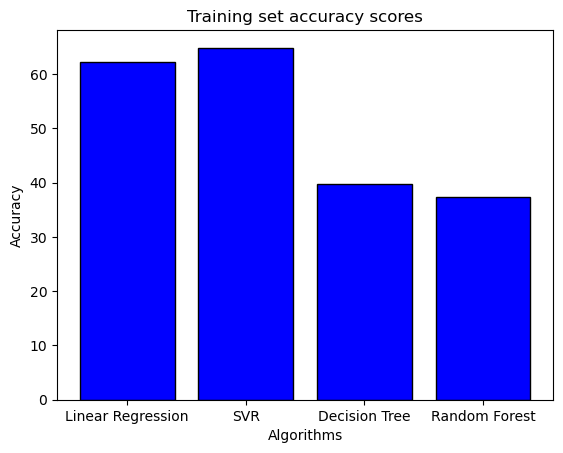

In [161]:
# For MSE
plt.bar(models,mses,color='blue',edgecolor='black')
plt.title("Training set accuracy scores")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

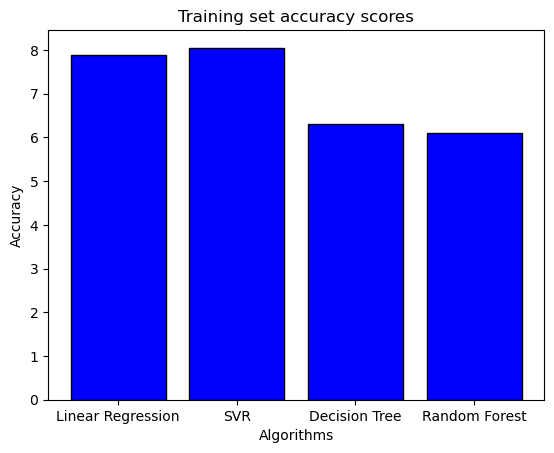

In [162]:
# For RMSE
plt.bar(models,rmses,color='blue',edgecolor='black')
plt.title("Training set accuracy scores")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

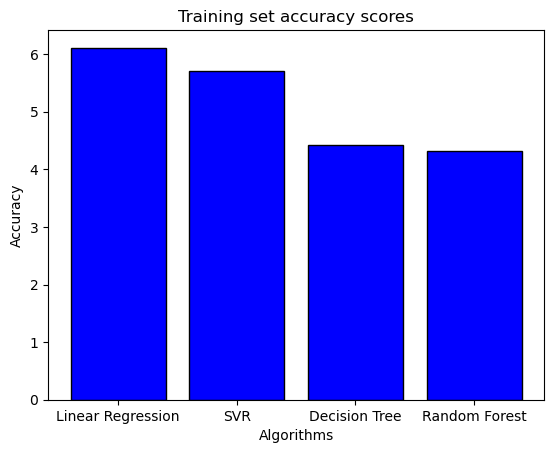

In [163]:
# For MAE
plt.bar(models,maes,color='blue',edgecolor='black')
plt.title("Training set accuracy scores")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

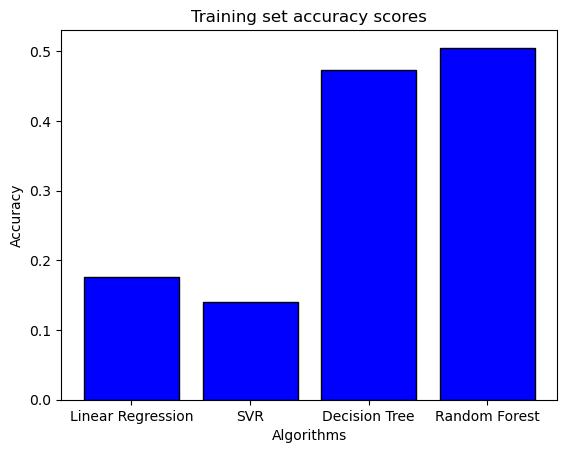

In [164]:
# For R2-Score
plt.bar(models,r2scores,color='blue',edgecolor='black')
plt.title("Training set accuracy scores")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# K-Cross Fold Validation and GrodSearchCV

In [204]:
# K-Cross Fold Validation
from sklearn.model_selection import cross_val_score, KFold
models={
    "Linear Regression": regressor1,
    "SVR": regressor2,
    "Decision Tree": regressor3,
    "Random Forest": regressor4
}
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
for name, model in models.items():
    scores=cross_val_score(model, X_train, y_train,
                           cv=kfold,
                           scoring='neg_mean_squared_error')
    rmse_scores=np.sqrt(-scores)
    print(f"{name}: Mean RMSE = {rmse_scores.mean():.3f}, Std = {rmse_scores.std():.3f}")

Linear Regression: Mean RMSE = 7.607, Std = 0.522
SVR: Mean RMSE = 7.510, Std = 0.773
Decision Tree: Mean RMSE = 3.691, Std = 0.508
Random Forest: Mean RMSE = 2.578, Std = 0.247


In [208]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
lr_params={
    'fit_intercept':[True, False],
    'copy_X':[True, False]
}
lr_grid=GridSearchCV(LinearRegression(),
                     lr_params,
                     cv=5,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     verbose=1)
lr_grid.fit(X_train, y_train)
svr_params={
    'kernel':['linear', 'rbf', 'poly'],
    'C':[0.1, 1, 10, 100],
    'gamma':['scale', 'auto']
}
svr_grid=GridSearchCV(SVR(),
                      svr_params,
                      cv=5,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1,
                      verbose=1)
svr_grid.fit(X_train, y_train)
dt_params={
    'max_depth':[None, 5, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}
dt_grid=GridSearchCV(DecisionTreeRegressor(random_state=42),
                     dt_params,
                     cv=5,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     verbose=1)
dt_grid.fit(X_train, y_train)
rf_params={
    'n_estimators':[50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10]
}
rf_grid=GridSearchCV(RandomForestRegressor(random_state=42),
                     rf_params,
                     cv=5,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     verbose=1)
rf_grid.fit(X_train, y_train)
# Displaying the results
print("\nBest Linear Regression Params:", lr_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-lr_grid.best_score_))
print("\nBest SVR Params:", svr_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-svr_grid.best_score_))
print("\nBest Decision Tree Params:", dt_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-dt_grid.best_score_))
print("\nBest Random Forest Params:", rf_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-rf_grid.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Linear Regression Params: {'copy_X': True, 'fit_intercept': True}
Best CV RMSE: 7.735449036413646

Best SVR Params: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV RMSE: 6.103521263765196

Best Decision Tree Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV RMSE: 3.5325977221680183

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 2.4365535919566756
